<a href="https://colab.research.google.com/github/MillenniumForce/DATA3001/blob/main/eda/JG_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [ ]:
!pip install pandarallel


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Load Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/COMP3001/datascience-cis-2022.csv")
df.time = pd.to_datetime(df.time, unit="ns")
df = df.set_index("time")

In [ ]:
df

,FromInternetTCPPort443IPurn:ietf:params:mud:controllerByteCount,FromInternetTCPPort443IPurn:ietf:params:mud:controllerPacketCount,FromInternetTCPPort554IPurn:ietf:params:mud:controllerByteCount,FromInternetTCPPort554IPurn:ietf:params:mud:controllerPacketCount,FromInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount,FromInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount,FromInternetUDPPort67IPurn:ietf:params:mud:controllerByteCount,FromInternetUDPPort67IPurn:ietf:params:mud:controllerPacketCount,ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerByteCount,ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerPacketCount,...,ToInternetTCPPort554IPurn:ietf:params:mud:controllerPacketCount,ToInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount,ToInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount,ToInternetUDPPort1024IPurn:ietf:params:mud:controllerByteCount,ToInternetUDPPort1024IPurn:ietf:params:mud:controllerPacketCount,ToLocalUDPPort5353IP224.0.0.251/32ByteCount,ToLocalUDPPort5353IP224.0.0.251/32PacketCount,ToLocalUDPPort67IP255.255.255.255/32ByteCount,ToLocalUDPPort67IP255.255.255.255/32PacketCount,device_mac
time,,,,,,,,,,,,,,,,,,,,,
2022-09-02 00:24:59.417,0,0,0,0,0,0,0,0,3568,8,...,0,395738,957,12625992,9093,0,0,0,0,bd:0d:8e:c5
2022-09-02 00:24:59.417,0,0,0,0,71161,266,0,0,1784,4,...,11246,68385,150,0,0,0,0,0,0,bd:24:bb:1e
2022-09-02 00:24:59.417,0,0,0,0,25880,91,0,0,3568,8,...,0,103786,243,0,0,0,0,0,0,bd:0d:af:0b
2022-09-02 00:24:59.417,0,0,0,0,0,0,0,0,3568,8,...,0,29638,81,0,0,0,0,0,0,ee:dd:34:1d
2022-09-02 00:24:59.417,0,0,0,0,0,0,1400,4,1784,4,...,9857,0,0,0,0,0,0,906,2,ee:dd:39:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-02 11:50:59.411,0,0,0,0,70941,263,1400,4,3568,8,...,0,29636,81,12869856,9407,0,0,906,2,bd:1c:dc:c0
2022-09-02 11:50:59.411,0,0,0,0,41295,159,1400,4,0,0,...,0,0,0,28982606,20872,0,0,906,2,bd:1c:d9:b1
2022-09-02 11:50:59.411,0,0,0,0,79071,299,0,0,3568,8,...,0,100937,236,14474587,10389,0,0,0,0,bd:24:bb:22


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14376698 entries, 2022-09-02 00:24:59.417000 to 2022-09-16 00:23:55.620000
Data columns (total 23 columns):
 #   Column                                                             Dtype 
---  ------                                                             ----- 
 0   FromInternetTCPPort443IPurn:ietf:params:mud:controllerByteCount    int64 
 1   FromInternetTCPPort443IPurn:ietf:params:mud:controllerPacketCount  int64 
 2   FromInternetTCPPort554IPurn:ietf:params:mud:controllerByteCount    int64 
 3   FromInternetTCPPort554IPurn:ietf:params:mud:controllerPacketCount  int64 
 4   FromInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount     int64 
 5   FromInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount   int64 
 6   FromInternetUDPPort67IPurn:ietf:params:mud:controllerByteCount     int64 
 7   FromInternetUDPPort67IPurn:ietf:params:mud:controllerPacketCount   int64 
 8   ToInternetRSVPPortAllIPurn:ietf:params:mud:c

In [ ]:
df.describe()

,FromInternetTCPPort443IPurn:ietf:params:mud:controllerByteCount,FromInternetTCPPort443IPurn:ietf:params:mud:controllerPacketCount,FromInternetTCPPort554IPurn:ietf:params:mud:controllerByteCount,FromInternetTCPPort554IPurn:ietf:params:mud:controllerPacketCount,FromInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount,FromInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount,FromInternetUDPPort67IPurn:ietf:params:mud:controllerByteCount,FromInternetUDPPort67IPurn:ietf:params:mud:controllerPacketCount,ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerByteCount,ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerPacketCount,...,ToInternetTCPPort554IPurn:ietf:params:mud:controllerByteCount,ToInternetTCPPort554IPurn:ietf:params:mud:controllerPacketCount,ToInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount,ToInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount,ToInternetUDPPort1024IPurn:ietf:params:mud:controllerByteCount,ToInternetUDPPort1024IPurn:ietf:params:mud:controllerPacketCount,ToLocalUDPPort5353IP224.0.0.251/32ByteCount,ToLocalUDPPort5353IP224.0.0.251/32PacketCount,ToLocalUDPPort67IP255.255.255.255/32ByteCount,ToLocalUDPPort67IP255.255.255.255/32PacketCount
count,14376698.0,14376698.0,1.437670e+07,1.437670e+07,1.437670e+07,1.437670e+07,1.437670e+07,1.437670e+07,1.437670e+07,1.437670e+07,...,1.437670e+07,1.437670e+07,1.437670e+07,1.437670e+07,1.437670e+07,1.437670e+07,1.437670e+07,1.437670e+07,1.437670e+07,1.437670e+07
mean,0.0,0.0,4.781723e+04,7.334744e+02,3.849944e+04,1.436301e+02,3.071269e+02,8.775041e-01,2.512827e+03,5.889668e+00,...,1.712083e+06,1.319156e+03,5.414169e+04,1.277776e+02,7.646958e+06,5.508480e+03,2.159239e+00,4.987167e-03,2.015482e+02,4.450038e-01
std,0.0,0.0,1.642787e+05,2.547708e+03,5.929165e+04,2.194950e+02,5.930711e+02,1.694472e+00,1.716079e+03,4.858573e+00,...,5.987946e+06,4.582245e+03,8.731618e+04,2.051444e+02,1.111784e+07,8.002215e+03,8.001317e+01,1.889730e-01,3.862680e+02,8.522340e-01
min,0.0,0.0,-4.000000e+02,0.000000e+00,-1.562000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-2.159000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.784000e+03,4.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.000000e+00,0.000000e+00,1.056200e+04,4.200000e+01,0.000000e+00,0.000000e+00,2.676000e+03,6.000000e+00,...,0.000000e+00,0.000000e+00,2.379700e+04,6.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.000000e+00,0.000000e+00,7.094100e+04,2.630000e+02,0.000000e+00,0.000000e+00,3.568000e+03,8.000000e+00,...,0.000000e+00,0.000000e+00,9.795300e+04,2.280000e+02,1.448396e+07,1.040300e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,0.0,0.0,3.138688e+06,4.895500e+04,1.979675e+06,7.063000e+03,1.104800e+04,1.200000e+01,3.286400e+04,1.120000e+02,...,1.094541e+08,8.470100e+04,2.628302e+06,6.023000e+03,1.732585e+08,1.214460e+05,1.398500e+04,1.900000e+01,2.718000e+03,6.000000e+00


# Plot each feature over time
**Use resampling for efficiency**

In [ ]:
def get_cols():
  cols = df.columns
  cols = [c for c in cols if c not in ["time", "device_mac"]]
  return cols

In [ ]:
def plot_timeseries(df, x_col="time"):
  nrows = 11
  ncols = 2
  i = 0
  df = df.reset_index()
  cols = get_cols()
  fig, axs = plt.subplots(nrows, ncols, sharex=True, figsize=(20,30))
  fig.tight_layout(pad=2)
  for row_idx in tqdm(range(nrows)):
    for col_idx in tqdm(range(ncols)):
      sns.lineplot(x=df[x_col],
                  y=df[cols[i]],
                  ax=axs[row_idx][col_idx])
      axs[row_idx][col_idx].set_title(cols[i])
      axs[row_idx][col_idx].set_ylabel("")
      axs[row_idx][col_idx].tick_params(labelrotation=45)
      i += 1

  plt.show()

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

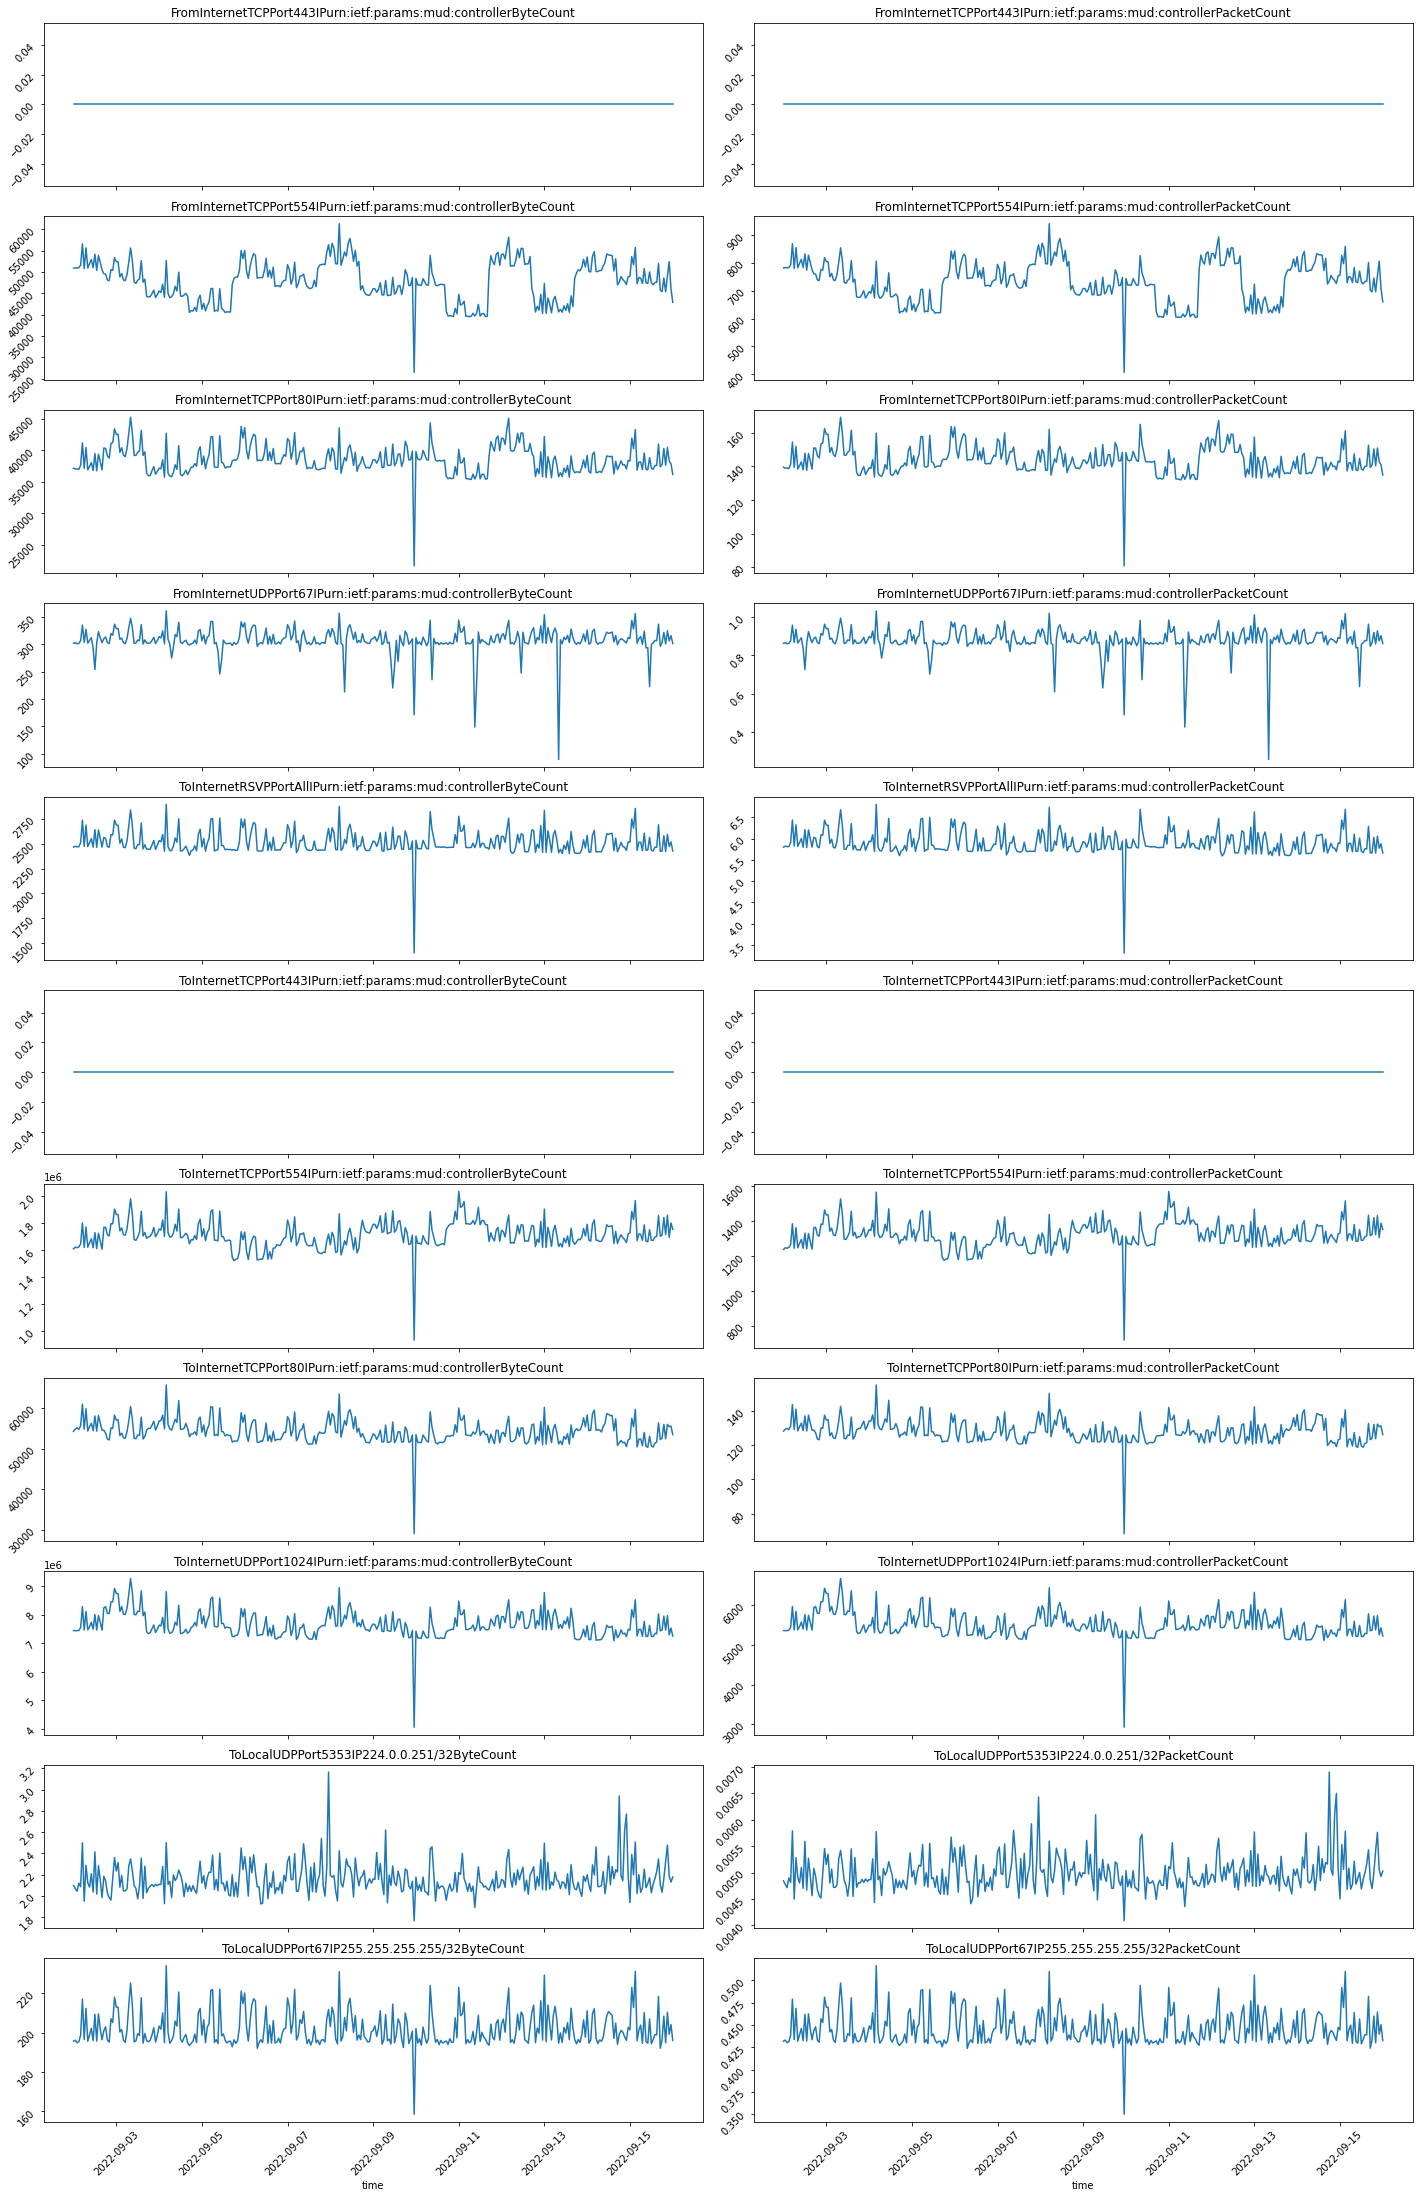

In [ ]:
# daily == 'D'
# hourly == 'H'
# 5 minute == '5min
# DON'T go lower than 1 min (obviously)
cols = get_cols()
plot_timeseries(df[cols].resample("H").mean())

## Notes

* port 443 is https: reasonable that there is no traffic
* port 1024: tcp
* port 67: common DHCP on UDP (used by the server which is weird, implying that the device is some kind of server). Note the adddress 255.255.255.255 means that it broadcasts to the entire network
* port 80: http
* RSVP port: reserve reservation protocol
* port 554: Real Time Streaming Protocol (RTSP)
* port 5353: Multicast DNS (used for small networks that don't include a local name server). 224.0.0.251 is also reserved for mDNS


# Pairplot

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


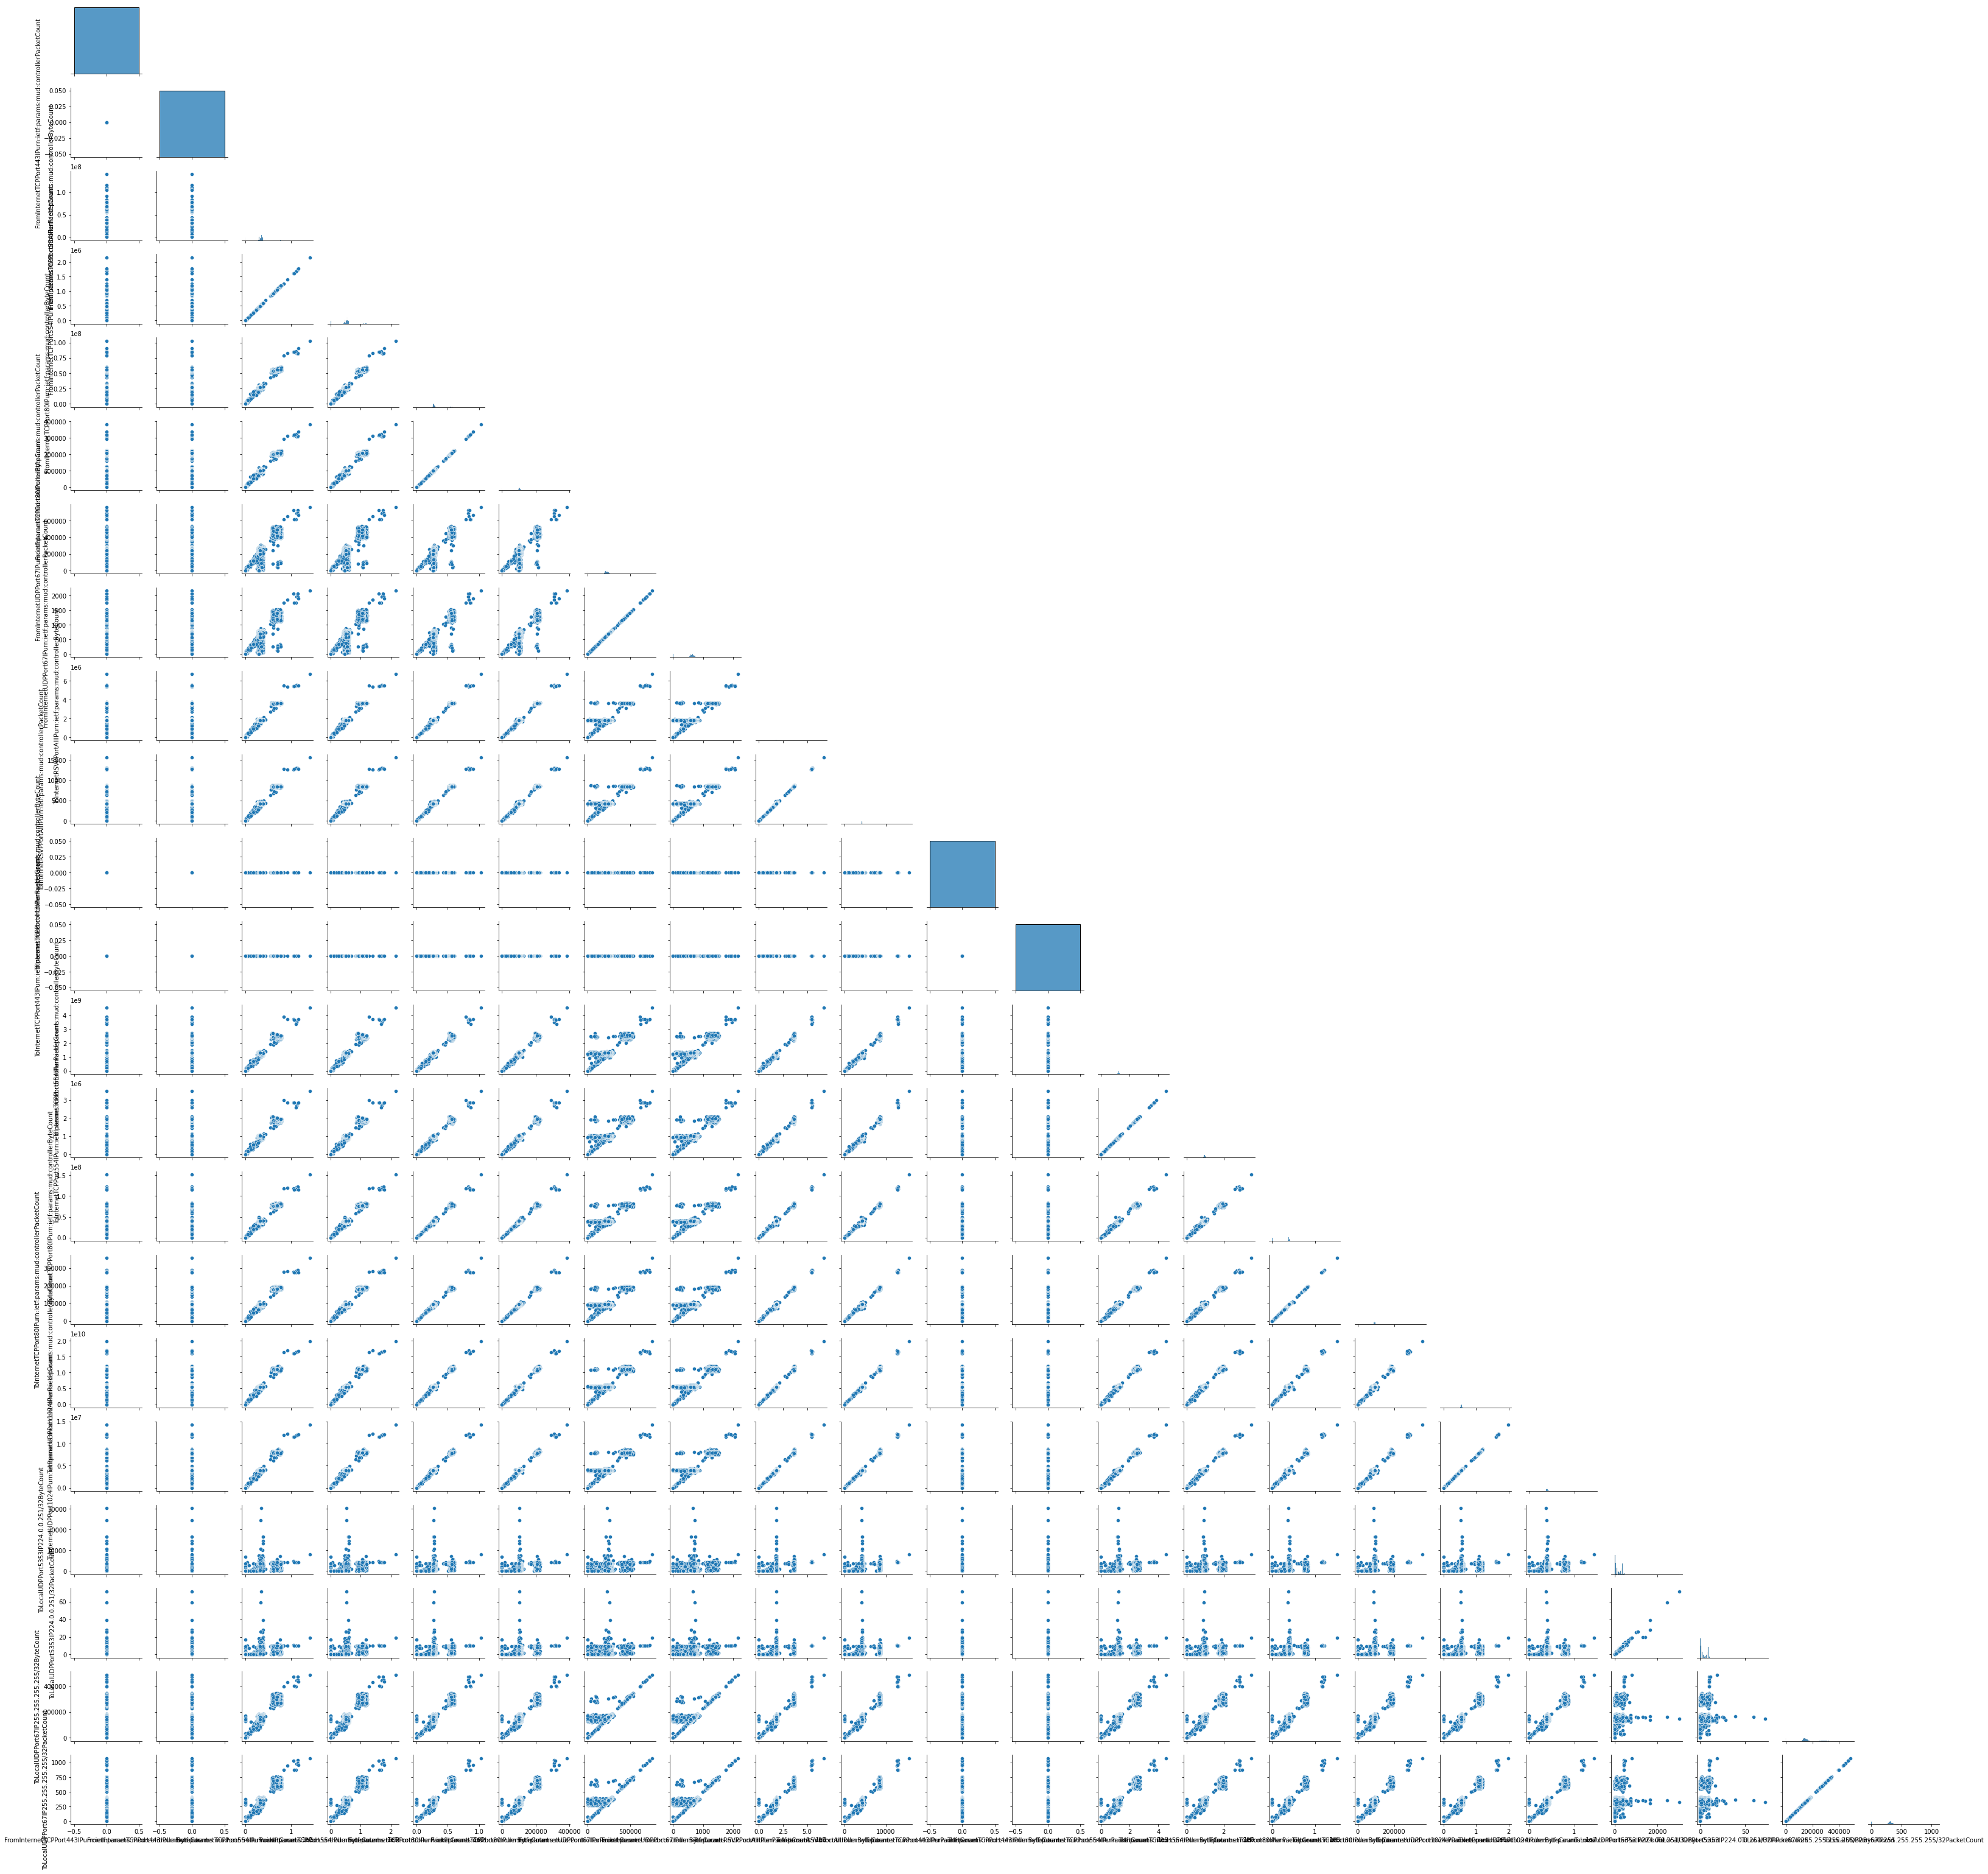

In [ ]:
sns.pairplot(df[get_cols()].resample("1min").sum(), corner=True)
plt.tight_layout()
plt.show()

# Why is there drop off at the end?

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

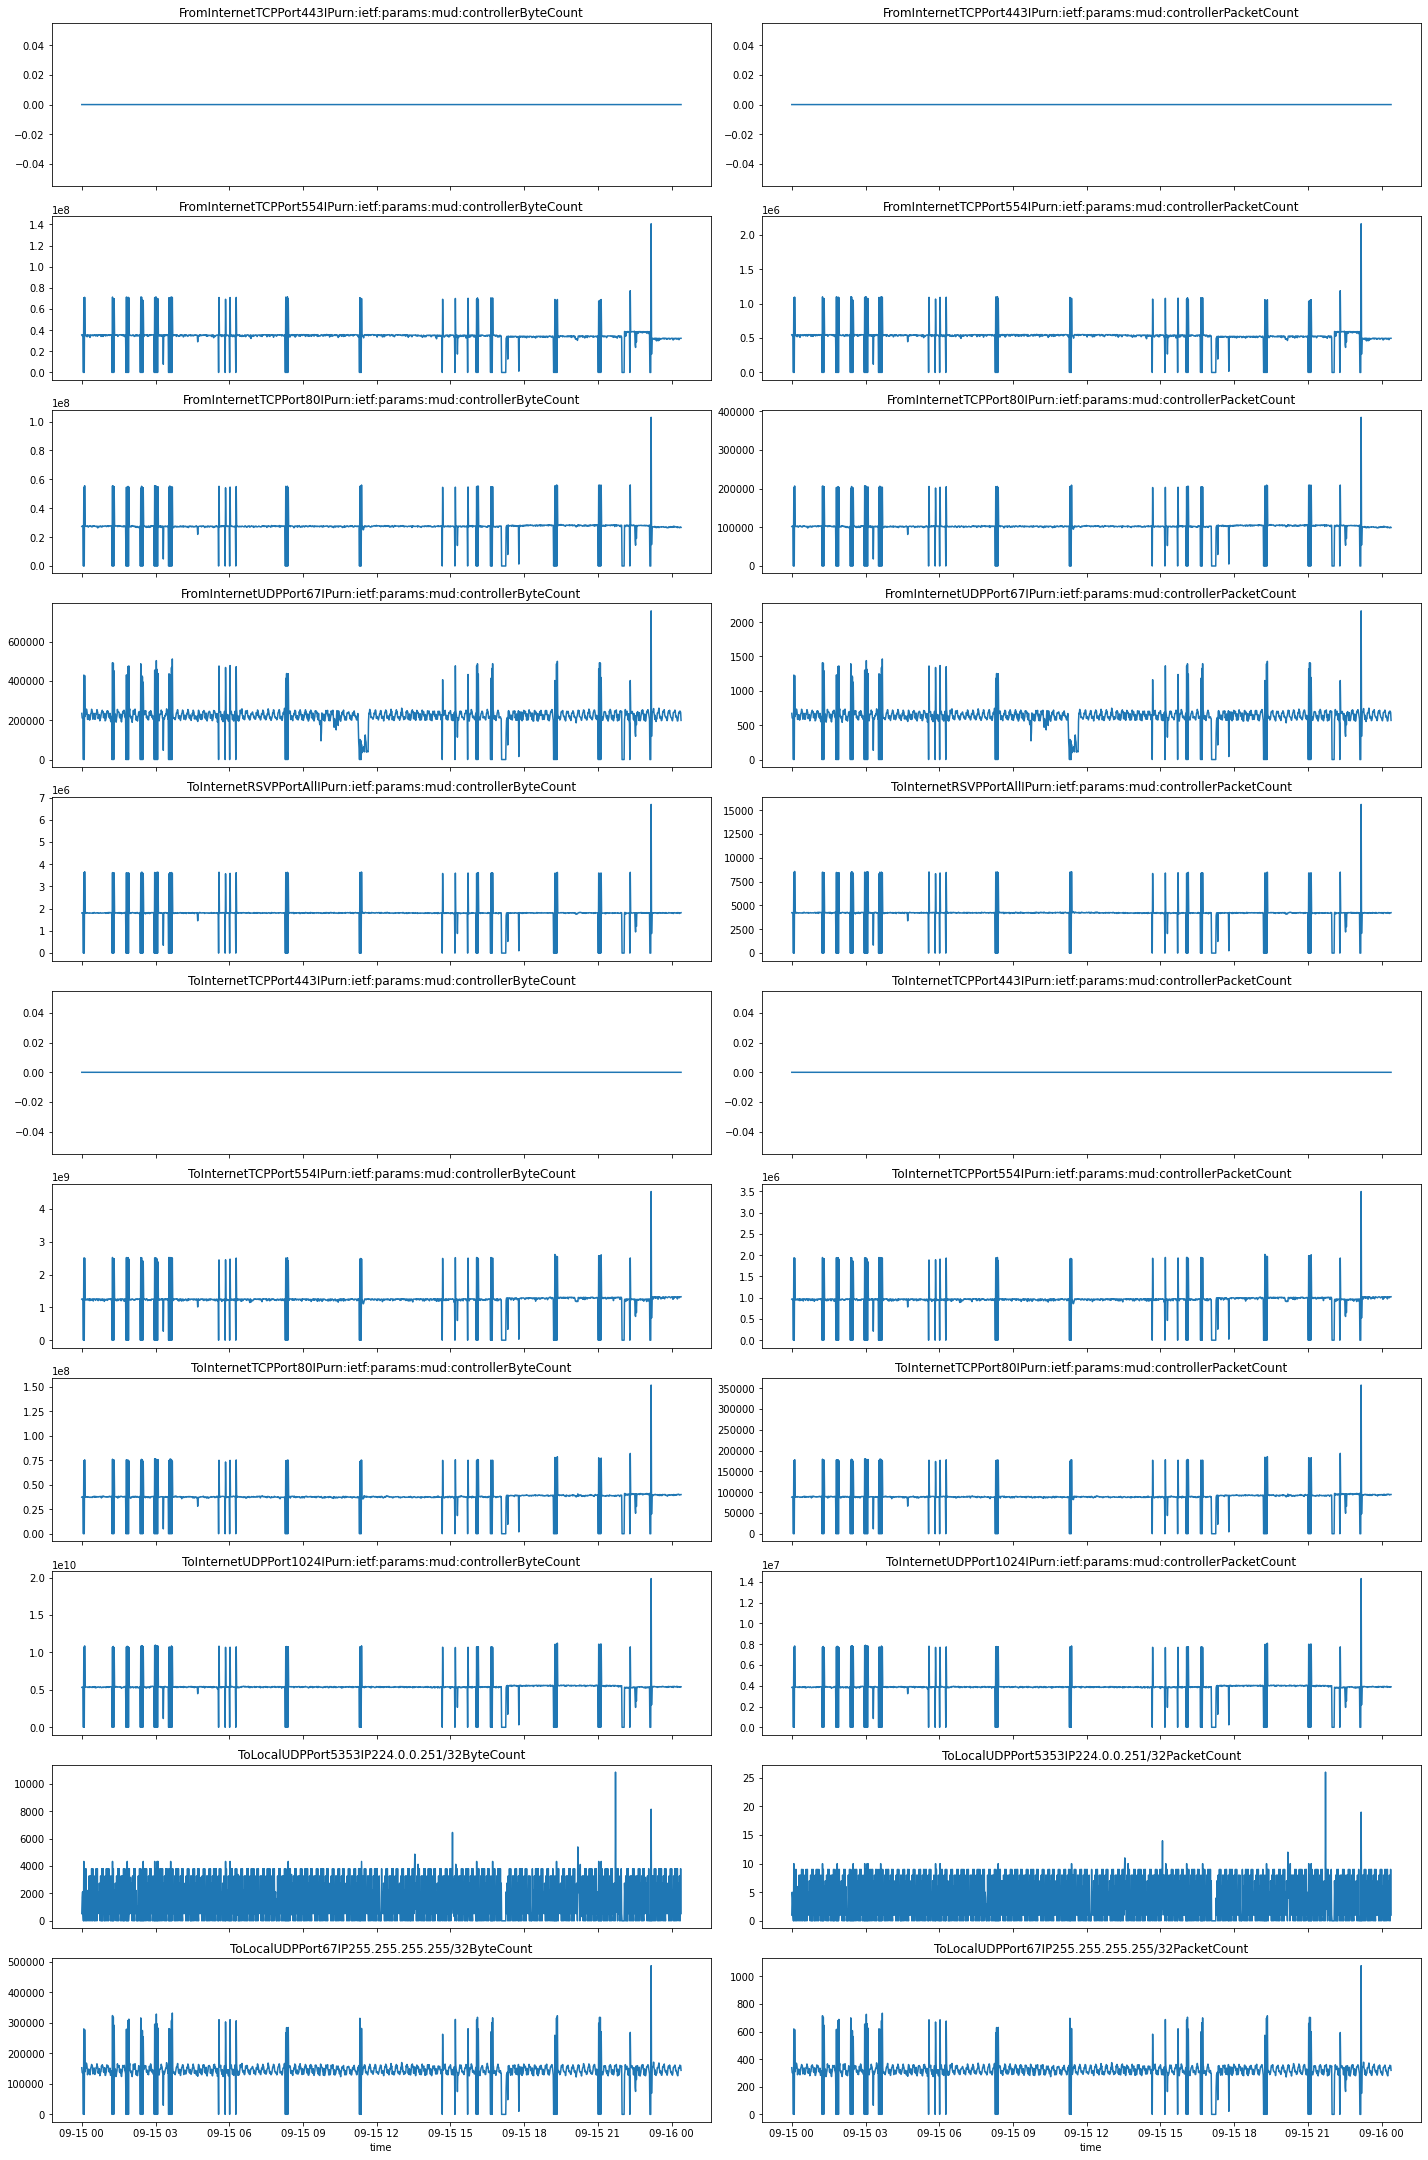

In [ ]:
# Dropoff occurs after 2022-09-15
plot_timeseries(df[datetime(2022, 9, 15):].resample("1min").sum())

# How many devices are there?

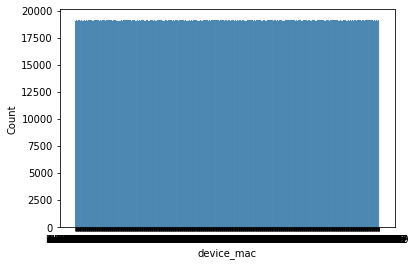

In [ ]:
# tldr: all devices contribute roughly equal
sns.histplot(df.device_mac)

In [ ]:
df.device_mac.value_counts()

5a:ff:cf:26    19148
ee:dd:38:36    19143
5a:ff:c5:40    19142
21:fd:4e:9c    19141
bd:1c:d6:c6    19137
               ...  
bd:1c:c4:3e    19036
ac:ee:3e:79    19034
bd:1c:d9:ae    19032
bd:1f:a4:1c    19031
bd:1c:c4:37    19027
Name: device_mac, Length: 753, dtype: int64

In [ ]:
print("Number of unique devices:", df.device_mac.nunique())

Number of unique devices: 753


## Device contribution

In [ ]:
device_contrib = df.groupby("device_mac").sum().reset_index()

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

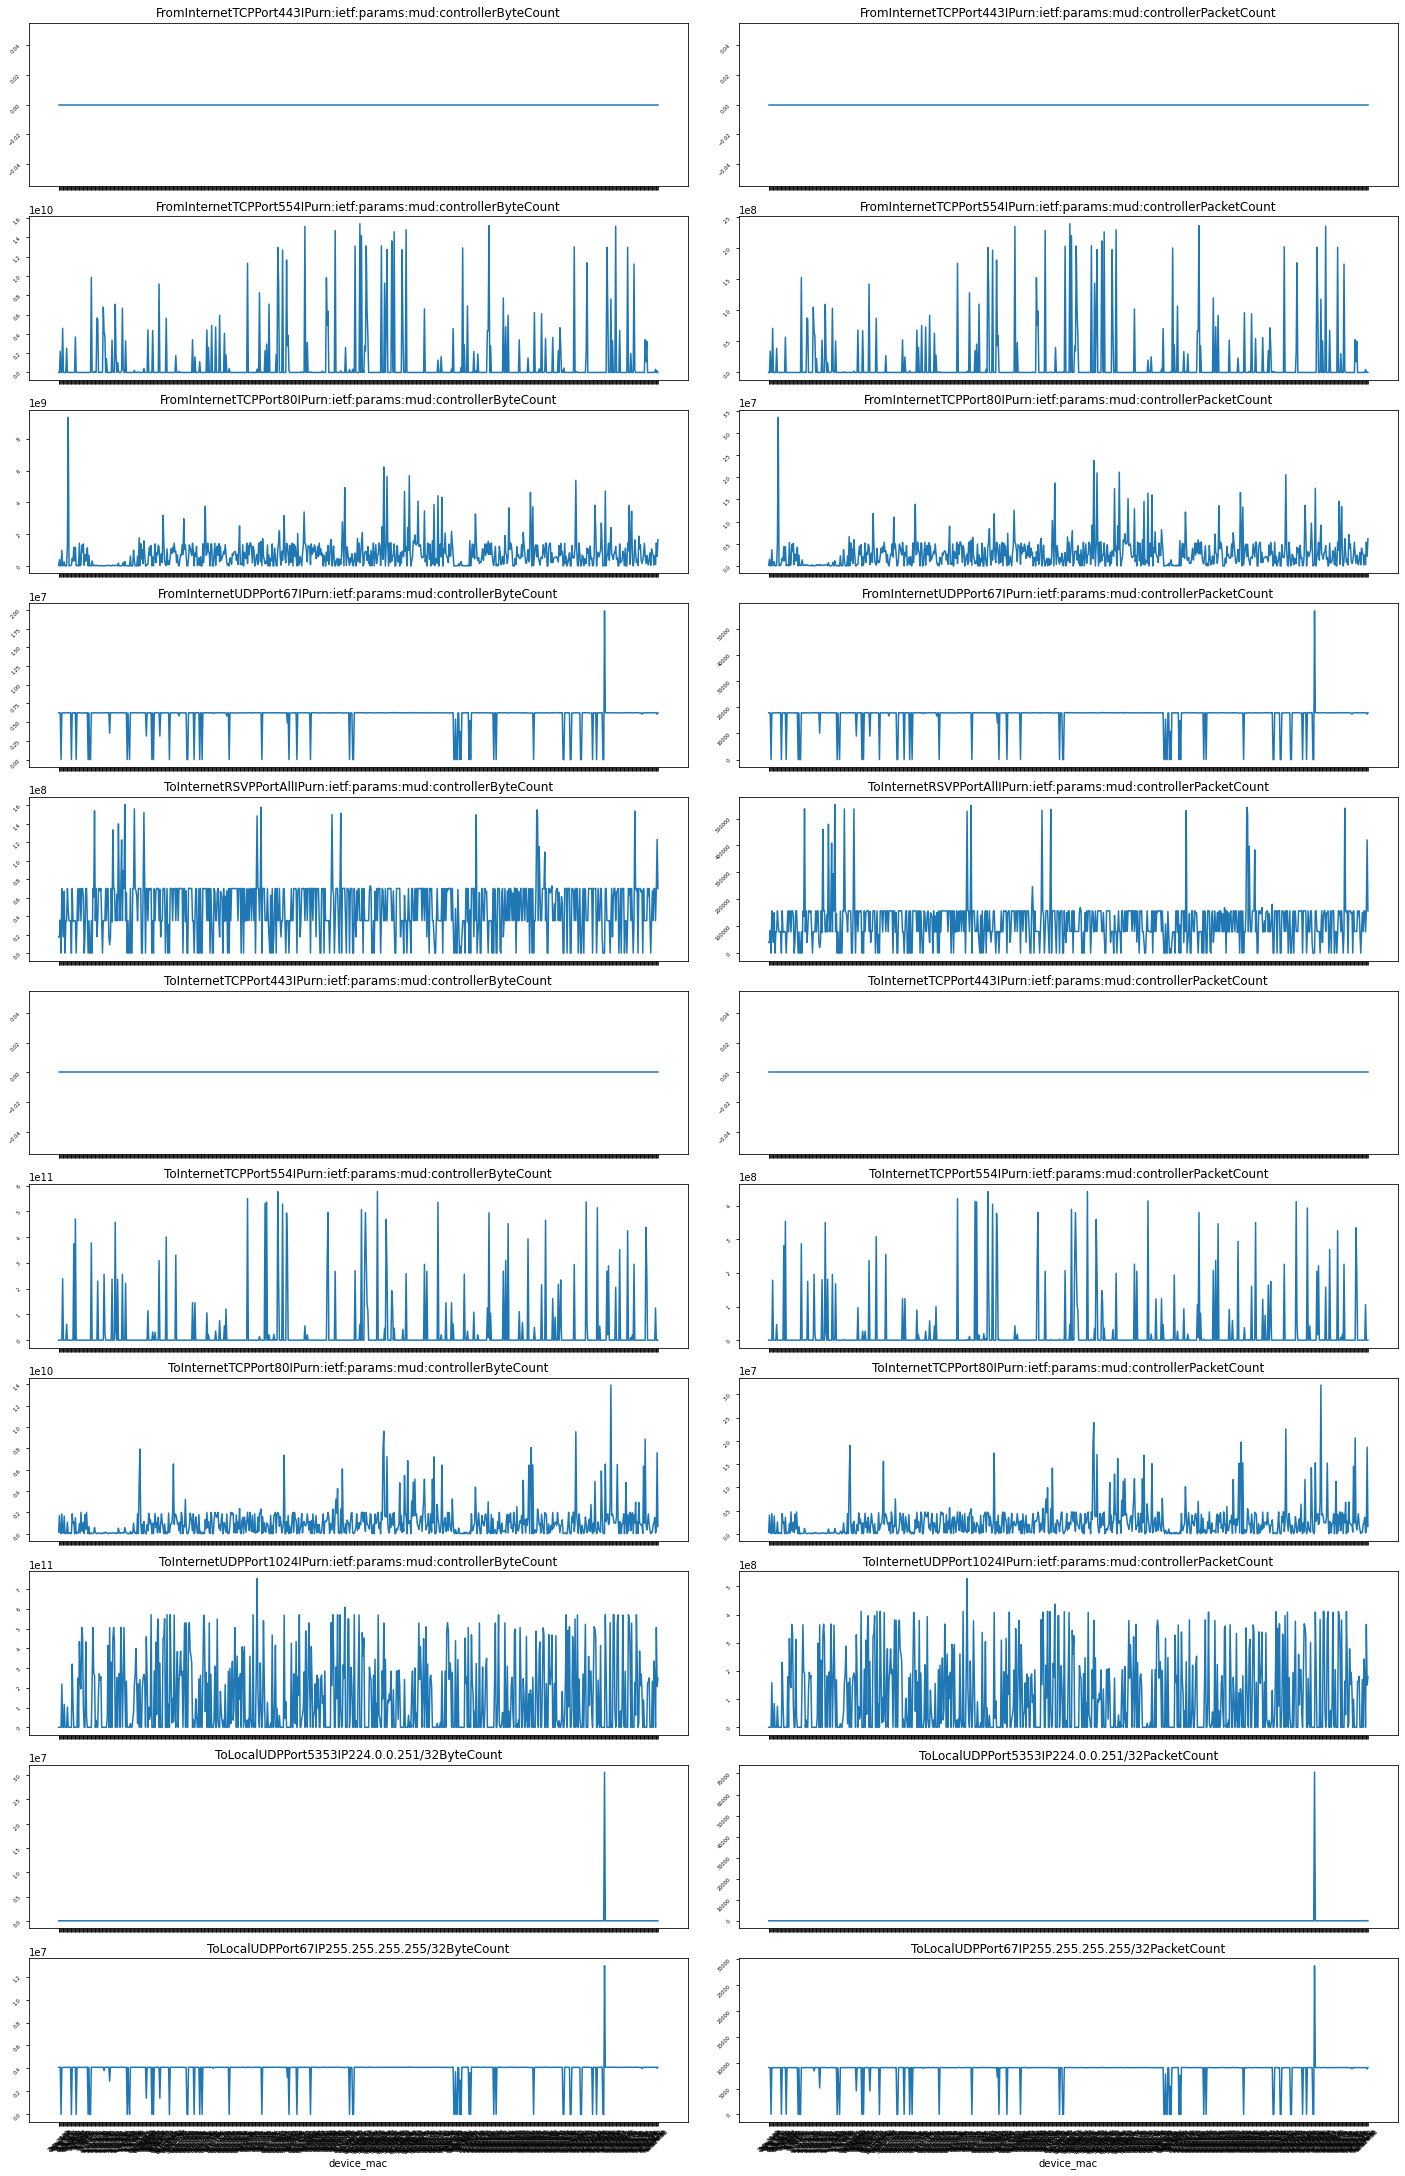

In [ ]:
plot_timeseries(device_contrib, x_col="device_mac")

# Test for stationarity

In [ ]:
cols = get_cols()
results = {}
for col in tqdm(cols):
  resampled = df[col].resample("1min").sum()
  result = adfuller(resampled)
  p_value = result[1]
  results[col] = p_value

for col, p_value in results.items():
  if p_value < 0.05:
    print(f"{col} is stationary ({p_value})")
  else:
    print(f"{col} is not stationary ({p_value})")

  0%|          | 0/22 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


FromInternetTCPPort443IPurn:ietf:params:mud:controllerByteCount is not stationary (nan)
FromInternetTCPPort443IPurn:ietf:params:mud:controllerPacketCount is not stationary (nan)
FromInternetTCPPort554IPurn:ietf:params:mud:controllerByteCount is stationary (1.2542006205473203e-17)
FromInternetTCPPort554IPurn:ietf:params:mud:controllerPacketCount is stationary (2.873162546508012e-17)
FromInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount is stationary (8.075494295913829e-30)
FromInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount is stationary (8.832524622082086e-30)
FromInternetUDPPort67IPurn:ietf:params:mud:controllerByteCount is stationary (0.0)
FromInternetUDPPort67IPurn:ietf:params:mud:controllerPacketCount is stationary (0.0)
ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerByteCount is stationary (0.0)
ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerPacketCount is stationary (0.0)
ToInternetTCPPort443IPurn:ietf:params:mud:controllerByteCount is not statio

# Autocorrelation

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:677: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:677: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:677: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:677: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

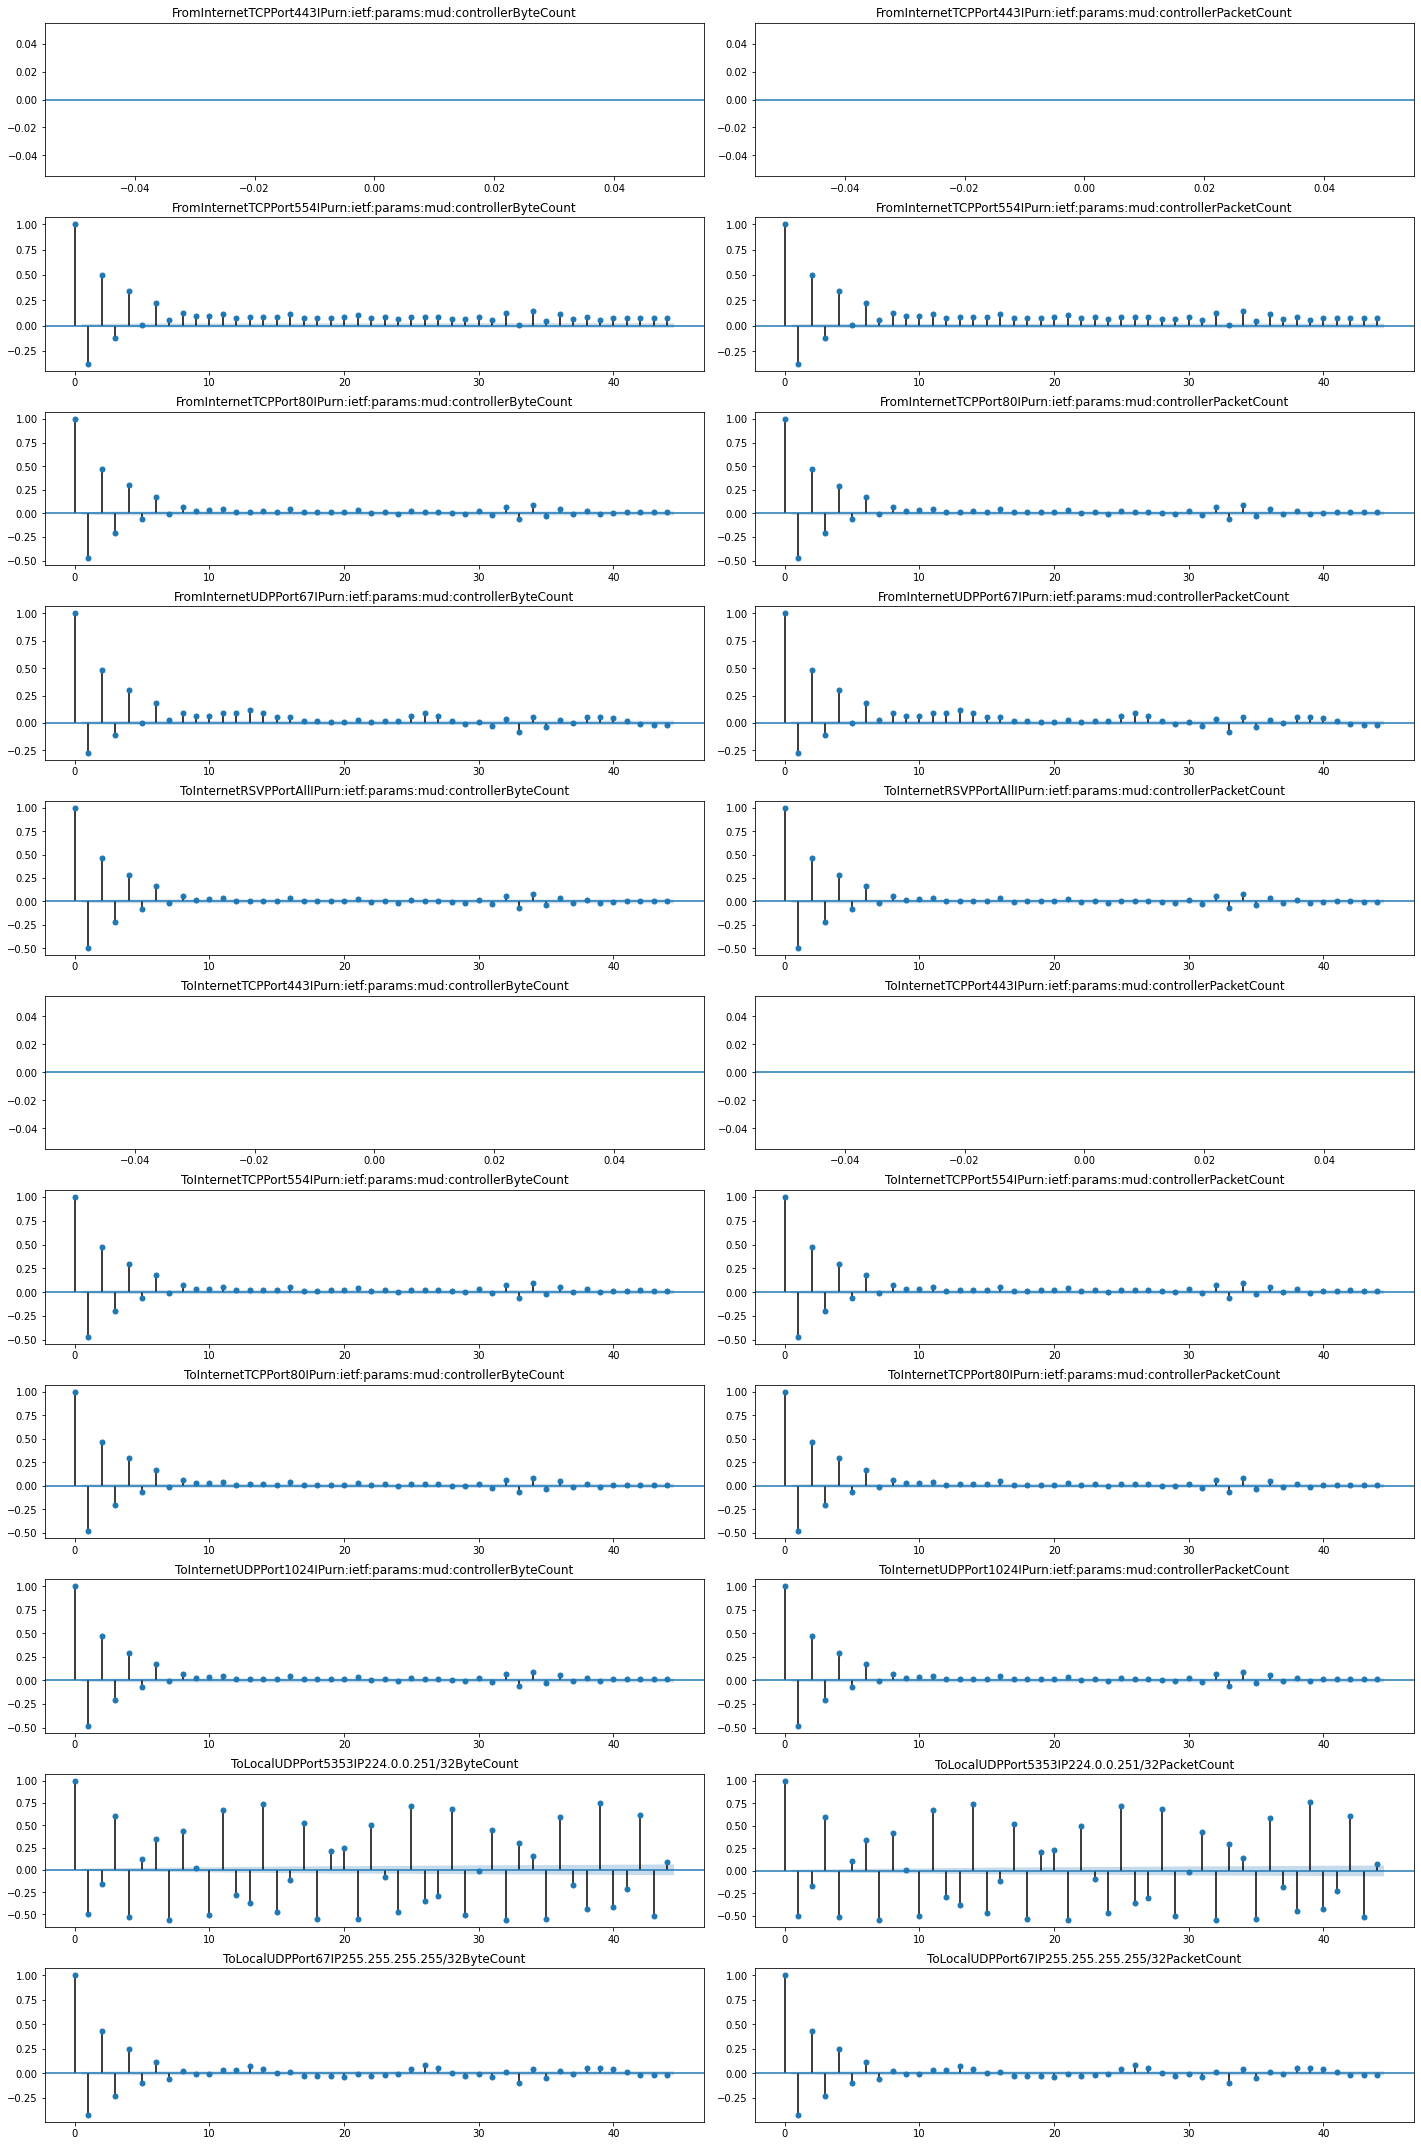

In [ ]:
nrows = 11
ncols = 2
i = 0
cols = get_cols()
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 30))
fig.tight_layout(pad=2)
for row_idx in tqdm(range(nrows)):
  for col_idx in tqdm(range(ncols)):
    resampled = df[cols[i]].resample("1min").sum()
    plot_acf(resampled, ax=axs[row_idx][col_idx])
    axs[row_idx][col_idx].set_title(cols[i])
    axs[row_idx][col_idx].set_ylabel("")
    i += 1

plt.show()

# Feature Strategies

## Oriented by time

In [ ]:
# Use mean?

df.resample("1min").sum()

,FromInternetTCPPort443IPurn:ietf:params:mud:controllerByteCount,FromInternetTCPPort443IPurn:ietf:params:mud:controllerPacketCount,FromInternetTCPPort554IPurn:ietf:params:mud:controllerByteCount,FromInternetTCPPort554IPurn:ietf:params:mud:controllerPacketCount,FromInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount,FromInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount,FromInternetUDPPort67IPurn:ietf:params:mud:controllerByteCount,FromInternetUDPPort67IPurn:ietf:params:mud:controllerPacketCount,ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerByteCount,ToInternetRSVPPortAllIPurn:ietf:params:mud:controllerPacketCount,...,ToInternetTCPPort554IPurn:ietf:params:mud:controllerByteCount,ToInternetTCPPort554IPurn:ietf:params:mud:controllerPacketCount,ToInternetTCPPort80IPurn:ietf:params:mud:controllerByteCount,ToInternetTCPPort80IPurn:ietf:params:mud:controllerPacketCount,ToInternetUDPPort1024IPurn:ietf:params:mud:controllerByteCount,ToInternetUDPPort1024IPurn:ietf:params:mud:controllerPacketCount,ToLocalUDPPort5353IP224.0.0.251/32ByteCount,ToLocalUDPPort5353IP224.0.0.251/32PacketCount,ToLocalUDPPort67IP255.255.255.255/32ByteCount,ToLocalUDPPort67IP255.255.255.255/32PacketCount
time,,,,,,,,,,,,,,,,,,,,,
2022-09-02 00:24:00,0,0,36927439,566890,27478325,103349,240100,686,1831316,4292,...,1198716991,921277,40015310,94665,5541379607,3990406,1056,2,159166,352
2022-09-02 00:25:00,0,0,38344330,588695,27749993,104079,240800,688,1827044,4292,...,1214059821,932856,39908910,94162,5474265819,3942979,0,0,155832,344
2022-09-02 00:26:00,0,0,37280012,572458,27813066,104606,238700,682,1845596,4332,...,1215015412,933492,39924436,94437,5581161702,4019645,3804,9,151610,335
2022-09-02 00:27:00,0,0,37045833,568914,27621514,103589,200200,572,1835788,4314,...,1187175321,911910,39498996,93618,5530677424,3984194,528,1,131388,291
2022-09-02 00:28:00,0,0,38307122,588350,27811258,104508,222600,636,1845956,4336,...,1215456656,933577,40294293,95249,5560246565,4005613,0,0,144652,319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-16 00:19:00,0,0,31932432,491389,26479517,98532,235200,672,1781336,4152,...,1298467785,1000614,39497700,93186,5378055774,3874713,3276,8,151302,334
2022-09-16 00:20:00,0,0,32293178,496957,26837540,99885,247100,706,1813898,4229,...,1325472300,1021648,40092286,94597,5422874956,3907146,1056,2,161558,356
2022-09-16 00:21:00,0,0,32304984,496810,26750355,99581,245700,702,1806320,4216,...,1323714600,1020149,39963948,94282,5350143264,3854738,0,0,158550,350


## Oriented by MAC (time features)

In [ ]:
# snap = df.groupby("device_mac").resample("5min").sum().reset_index()
# pd.pivot_table(snap,
#                index="device_mac",
#                columns=snap.time,
#                values=get_cols(),
#                aggfunc=np.sum)

In [ ]:
window = "5min"
df.groupby("device_mac").resample(window).sum().unstack()

FromInternetTCPPort443IPurn:ietf:params:mud:controllerByteCount  \
time                                                    2022-09-02 00:20:00   
device_mac                                                                    
21:fa:27:56                                                0.0                
21:fa:27:82                                                0.0                
21:fa:29:50                                                0.0                
21:fa:2d:cf                                                0.0                
21:fa:2e:47                                                0.0                
...                                                        ...                
ee:dd:4e:5f                                                0.0                
ee:dd:4e:60                                                0.0                
ee:dd:4f:4c                                                0.0                
ee:dd:4f:57                                                0.0                
ee:dd:4f:cd                                                0.0                

                                                                         \
time        2022-09-02 00:25:00 2022-09-02 00:30:00 2022-09-02 00:35:00   
device_mac                                                                
21:fa:27:56                 0.0                 0.0                 0.0   
21:fa:27:82                 0.0                 0.0                 0.0   
21:fa:29:50                 0.0                 0.0                 0.0   
21:fa:2d:cf                 0.0                 0.0                 0.0   
21:fa:2e:47                 0.0                 0.0                 0.0   
...                         ...                 ...                 ...   
ee:dd:4e:5f                 0.0                 0.0                 0.0   
ee:dd:4e:60                 0.0                 0.0                 0.0   
ee:dd:4f:4c                 0.0                 0.0                 0.0   
ee:dd:4f:57                 0.0                 0.0                 0.0   
ee:dd:4f:cd                 0.0                 0.0                 0.0   

                                                                         \
time        2022-09-02 00:40:00 2022-09-02 00:45:00 2022-09-02 00:50:00   
device_mac                                                                
21:fa:27:56                 0.0                 0.0                 0.0   
21:fa:27:82                 0.0                 0.0                 0.0   
21:fa:29:50                 0.0                 0.0                 0.0   
21:fa:2d:cf                 0.0                 0.0                 0.0   
21:fa:2e:47                 0.0                 0.0                 0.0   
...                         ...                 ...                 ...   
ee:dd:4e:5f                 0.0                 0.0                 0.0   
ee:dd:4e:60                 0.0                 0.0                 0.0   
ee:dd:4f:4c                 0.0                 0.0                 0.0   
ee:dd:4f:57                 0.0                 0.0                 0.0   
ee:dd:4f:cd                 0.0                 0.0                 0.0   

                                                                         ...  \
time        2022-09-02 00:55:00 2022-09-02 01:00:00 2022-09-02 01:05:00  ...   
device_mac                                                               ...   
21:fa:27:56                 0.0                 0.0                 0.0  ...   
21:fa:27:82                 0.0                 0.0                 0.0  ...   
21:fa:29:50                 0.0                 0.0                 0.0  ...   
21:fa:2d:cf                 0.0                 0.0                 0.0  ...   
21:fa:2e:47                 0.0                 0.0                 0.0  ...   
...                         ...                 ...                 ...  ...   
ee:dd:4e:5f                 0.0                 0.0                 0.0  ...   
ee:

# Questions

* Why do the packets/bytes start and end low? Measurement error?
* Access to test data?

# FFT Experiment

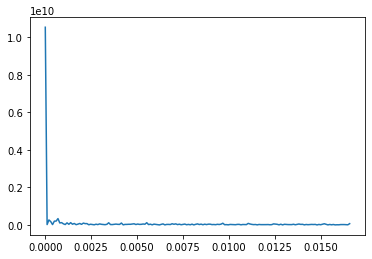

In [ ]:
# from scipy.fft import rfft, rfftfreq
yf = rfft(df[cols].resample("H").sum()[cols[3]])
N = len(yf)
n = np.arange(N)
sr = 1 / 60
T = N / sr
xf = n / T
plt.plot(xf, np.abs(yf))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


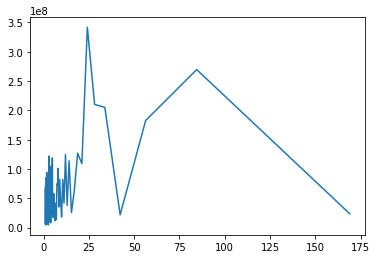

In [ ]:
plt.plot(1/xf / 60, np.abs(yf))